In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 네브라스카주 링컨시 데이터 다운: https://github.com/amcquistan/WeatherPredictPythonML
df_weather = pd.read_csv("end-part2_df.csv", index_col="date")

# 2016년 데이터만 선택
df_2016 = df_weather.filter(like="2016", axis=0)

# 날짜에서 월 추출
df_2016.reset_index(inplace=True)
df_2016["month"] = df_2016["date"].apply(lambda s: int(s.split("-")[1]))

In [4]:
import os
os.getcwd()

'C:\\Users\\Choi\\Desktop\\jupyter\\시각화'

[-30. -20. -10.   0.  10.  20.  30.  40.]


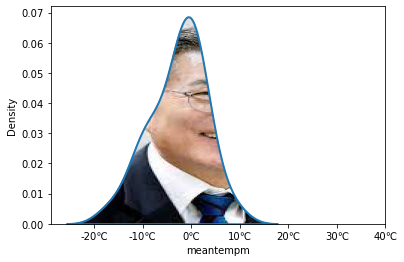

In [206]:
x = np.linspace(0, 1, 100)
fig,ax = plt.subplots()
sns.kdeplot(df_2016.query(f"month=={i}")["meantempm"],
            fill=True, alpha=0, linewidth=2, legend=False,ax=ax)
ax.set_xlim(-29, 40)
im=ax.imshow(moon, 
               cmap="jet",
               aspect="auto",
               extent=[*ax.get_xlim(), *ax.get_ylim()]   # [-29.0, 40.0, 0.0, 0.07204101874112218]
            )
path = ax.collections[0].get_paths()[0]
patch = mpl.patches.PathPatch(path, transform=ax.transData)
im.set_clip_path(patch)

#def format_func(value, tick_number):
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,y:str(int(x)) + '℃'))

print(ax.get_xticks())
    # ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x:f'{x} gg'))

In [93]:
[*ax.get_xlim(), *ax.get_ylim()]

[-29.0, 40.0, 0.0, 0.07204101874112218]

In [12]:
import matplotlib.ticker as ticker

In [13]:
ax.get_ylim()

(0.0, 0.09111648269796463)

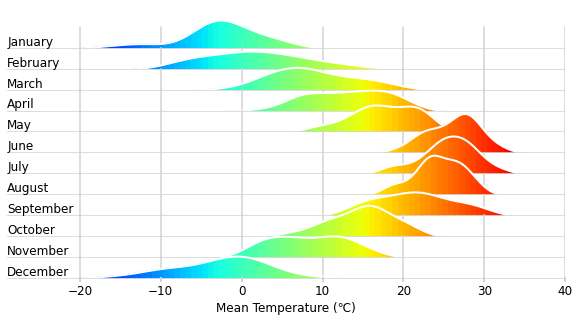

In [17]:
### 시각화


# [] 안에서 *은 튜플의 원소를 꺼낸다.

import calendar 

fig, axs = plt.subplots(nrows=12, figsize=(10,5), sharex=True, sharey=True)
fig.set_facecolor("none")

x = np.linspace(0, 1, 100)
for i, ax in enumerate(axs, 1):
    sns.kdeplot(df_2016.query(f"month=={i}")["meantempm"],
                fill=True, color="w", alpha=0, linewidth=2, legend=False, ax=ax)
    
    ax.set_xlim(-29, 40)

    # >>> 밀도함수에 gradient 추가
    im = ax.imshow(np.vstack([x, x]), 
               cmap="jet",
               aspect="auto",
               extent=[*ax.get_xlim(), *ax.get_ylim()]
              )
    path = ax.collections[0].get_paths()[0]
    patch = mpl.patches.PathPatch(path, transform=ax.transData)
    im.set_clip_path(patch)
    # <<< 밀도함수에 gradient 추가
    
    ax.text(-29, 0.01, calendar.month_name[i], fontdict={"fontsize":"large"}) 
    
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    if i != 12:
        ax.tick_params(axis="x", length=0)
    else:
        ax.tick_params(axis="x", direction="inout", color="lightgray", 
                       length=5, width=2, labelsize="large")
        ax.set_xlabel("Mean Temperature (℃)", fontdict={"fontsize":"large"})
    
    ax.set_yticks([]) 
    ax.set_ylabel("") 
    
    xticks = ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick, xtick], [0, 0.065], color='lightgray', zorder=0)
        
    ax.axhline(0, color="lightgray")
    ax.set_facecolor("none")
    #ax.xaxis.set_major_formatter(ticker.FuncFormatter(ticker.StrMethodFormatter(f'{x}도')))
    
fig.subplots_adjust(hspace=-0.5)

In [158]:
sq = '''7 3 6 4 2 9 5 8 1
5 8 9 1 6 7 3 2 4
2 1 4 5 8 3 6 9 7
8 4 7 9 3 6 1 5 2
1 5 3 8 4 2 9 7 6
9 6 2 7 5 1 8 4 3
4 2 1 3 9 8 7 6 5
3 9 5 6 7 4 2 1 8
6 7 8 2 1 5 4 3 9'''
sq = np.array(sq.replace('\n',' ').split(' ')).reshape(9,9)

In [164]:
sq = sq.astype('int')

In [165]:
sq

array([[7, 3, 6, 4, 2, 9, 5, 8, 1],
       [5, 8, 9, 1, 6, 7, 3, 2, 4],
       [2, 1, 4, 5, 8, 3, 6, 9, 7],
       [8, 4, 7, 9, 3, 6, 1, 5, 2],
       [1, 5, 3, 8, 4, 2, 9, 7, 6],
       [9, 6, 2, 7, 5, 1, 8, 4, 3],
       [4, 2, 1, 3, 9, 8, 7, 6, 5],
       [3, 9, 5, 6, 7, 4, 2, 1, 8],
       [6, 7, 8, 2, 1, 5, 4, 3, 9]])

In [186]:
len(np.unique(pd.DataFrame(sq).apply(lambda x:len(np.unique(x)))))

1

In [187]:
len(np.unique(pd.DataFrame(sq).T.apply(lambda x:len(np.unique(x)))))

1

In [201]:
for m in [0,3,6]:
    for n in [0,3,6]:
        if len(np.unique(sq[m:m+3,n:n+3])) != 9:
            print('invalid')